In [1]:
!nvidia-smi

Tue Apr 16 15:15:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os

In [3]:
import zipfile
import io

# # Specify the path to the uploaded zip file
# zip_path = '/content/ezyzip.zip'  # Replace 'your_uploaded_file.zip' with the name of your uploaded zip file

# # Unzip the file
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall('/content')  # Extract the contents to '/content' directory

In [3]:
# !pip install kaggle

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#     print('Uploaded file "{name}" with length {length} bytes'.format(
#         name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle (3).json
Uploaded file "kaggle (3).json" with length 70 bytes


In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# os.environ["KAGGLE_CONFIG_DIR"] = '/content/'

In [ ]:
# !kaggle datasets download -d kshitij192/cars-image-dataset

cars-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip //content/ezyzip.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Tata Safari/641 - Copy.jpg  
  inflating: train/Tata Safari/641.jpg  
  inflating: train/Tata Safari/642 - Copy.jpg  
  inflating: train/Tata Safari/642.jpg  
  inflating: train/Tata Safari/645 - Copy.jpg  
  inflating: train/Tata Safari/645.jpg  
  inflating: train/Tata Safari/646 - Copy.jpg  
  inflating: train/Tata Safari/646.jpg  
  inflating: train/Tata Safari/648 - Copy.jpg  
  inflating: train/Tata Safari/648.jpg  
  inflating: train/Tata Safari/649 - Copy.jpg  
  inflating: train/Tata Safari/649.jpg  
  inflating: train/Tata Safari/65 - Copy.jpg  
  inflating: train/Tata Safari/65.jpg  
  inflating: train/Tata Safari/650 - Copy.jpg  
  inflating: train/Tata Safari/650.jpg  
  inflating: train/Tata Safari/652 - Copy.jpg  
  inflating: train/Tata Safari/652.jpg  
  inflating: train/Tata Safari/653 - Copy.jpg  
  inflating: train/Tata Safari/653.jpg  
  inflating: train/Tata Safari/655 - Copy.jpg  
  inflating: 

Load and Preprocess the Data:


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


train_dir = '/content/train'
test_dir = '/content/test'
img_height, img_width = 224, 224
batch_size = 32

In [6]:
len(train_dir),len(test_dir)

(14, 13)

In [7]:
# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
 )

In [8]:
# Load training data and split into training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use subset argument to specify 'training' split
)

Found 5705 images belonging to 7 classes.


In [9]:
# No data augmentation for the test set, only rescaling
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 813 images belonging to 7 classes.


In [10]:
class_indices = train_generator.class_indices

In [11]:
# Initialize a dictionary to store the count of images for each class
class_counts = {class_name: 0 for class_name in class_indices}

In [12]:
# Loop through the files in the train directory and count the images for each class
for class_name in class_indices:
    class_dir = os.path.join(train_dir, class_name)
    class_count = len(os.listdir(class_dir))
    class_counts[class_name] = class_count

# Print the count of images for each class
for class_name, count in class_counts.items():
    print(f"Number of images in class {class_name}: {count}")

Number of images in class Audi: 814
Number of images in class Hyundai Creta: 813
Number of images in class Mahindra Scorpio: 799
Number of images in class Rolls Royce: 788
Number of images in class Swift: 810
Number of images in class Tata Safari: 879
Number of images in class Toyota Innova: 802


Calculate Class Weights:


Regarding the class imbalance problem:
Yes, there is a class imbalance problem in this dataset. The number of images varies significantly across different classes. This can lead to biases during model training, where the model might become biased towards the majority class and perform poorly on the minority classes.

In [13]:
sorted_class_counts = sorted(class_counts.items(), key=lambda x: x[1])

# Most represented class (last element in sorted list)
most_represented_class = sorted_class_counts[-1]
most_represented_class_name, most_represented_count = most_represented_class

# Least represented class (first element in sorted list)
least_represented_class = sorted_class_counts[0]
least_represented_class_name, least_represented_count = least_represented_class

# Print the most and least represented classes
print("Most represented class:", most_represented_class_name, "with", most_represented_count, "images")
print("Least represented class:", least_represented_class_name, "with", least_represented_count, "images")

Most represented class: Tata Safari with 879 images
Least represented class: Rolls Royce with 788 images


In [14]:
import pandas as pd

In [15]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights to handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:")
for class_label, weight in class_weights_dict.items():
    print(class_label, ":", weight)

Class Weights:
0 : 1.0012285012285012
1 : 1.002460024600246
2 : 1.0200250312891115
3 : 1.034263959390863
4 : 1.0061728395061729
5 : 0.9271899886234357
6 : 1.0162094763092269


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [17]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 output classes
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

 The 'adam' optimizer will be used to minimize the categorical cross-entropy loss during training, aiming to improve the model's accuracy on the multi-class classification task.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [19]:
# Train the model with class weights
car_model = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,  # added to specify the number of validation steps
    epochs=40,class_weight=class_weights_dict
)

Epoch 1/40
178/178 [==============================] - 78s 393ms/step - loss: 1.9855 - accuracy: 0.1768 - val_loss: 1.8880 - val_accuracy: 0.2675
Epoch 2/40
178/178 [==============================] - 74s 413ms/step - loss: 1.8305 - accuracy: 0.2625 - val_loss: 1.7211 - val_accuracy: 0.3438
Epoch 3/40
178/178 [==============================] - 73s 409ms/step - loss: 1.7362 - accuracy: 0.3215 - val_loss: 1.6986 - val_accuracy: 0.3425
Epoch 4/40
178/178 [==============================] - 73s 409ms/step - loss: 1.6632 - accuracy: 0.3658 - val_loss: 1.5708 - val_accuracy: 0.4512
Epoch 5/40
178/178 [==============================] - 72s 405ms/step - loss: 1.5939 - accuracy: 0.3975 - val_loss: 1.5195 - val_accuracy: 0.4450
Epoch 6/40
178/178 [==============================] - 73s 408ms/step - loss: 1.5121 - accuracy: 0.4183 - val_loss: 1.3997 - val_accuracy: 0.5025
Epoch 7/40
178/178 [==============================] - 74s 418ms/step - loss: 1.4346 - accuracy: 0.4680 - val_loss: 1.3811 - val_ac

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
model.save('/content/drive/MyDrive/handwritezy model by prakash/car_model_balance_40.h5')

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, average_precision_score
import numpy as np

In [24]:
y_pred = model.predict(test_generator)
y_true = test_generator.classes

26/26 [==============================] - 2s 67ms/step


In [25]:
# Convert probabilities to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)
unique_classes, class_counts = np.unique(y_pred_classes, return_counts=True)

# Print the unique class indices and their counts
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: Count {count}")

Class 0: Count 197
Class 1: Count 81
Class 2: Count 99
Class 3: Count 72
Class 4: Count 99
Class 5: Count 111
Class 6: Count 154


In [26]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred_classes)
# it takes the weighted average,
# where each class's contribution is proportional to the number of samples in that class.

In [27]:
car_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
# Plot the confusion matrix (Optional)
import seaborn as sns
import matplotlib.pyplot as plt

Accuracy: 0.8425584255842559
Precision: 0.8552702872746454
Recall: 0.8425584255842559
F1-Score: 0.8447150439109254


In [29]:
acc = car_model.history['accuracy']
val_acc = car_model.history['val_accuracy']

loss = car_model.history['loss']
val_loss = car_model.history['val_loss']

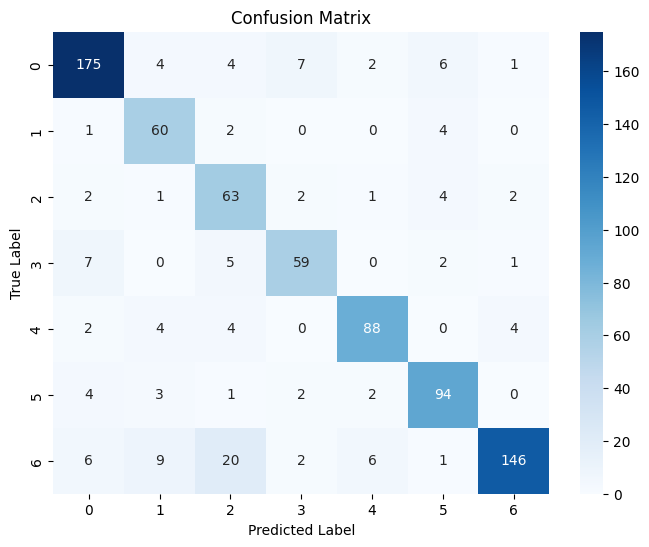

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

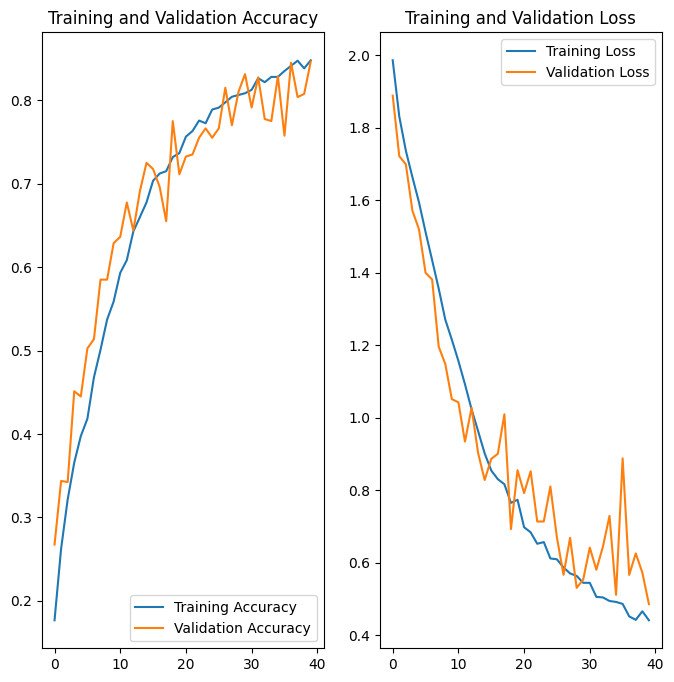

In [31]:
import matplotlib.pyplot as plt
EPOCHS = 40

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

26/26 [==============================] - 1s 48ms/step - loss: 0.4952 - accuracy: 0.8426
Test Loss: 0.4952370524406433
Test Accuracy: 0.8425584435462952


In [33]:
from sklearn.metrics import classification_report
y_true=test_generator.classes
predictions=model.predict(test_generator,  steps =813)
y_pred = np.argmax(predictions, axis=-1)
print(classification_report(y_true,y_pred))

 25/813 [..............................] - ETA: 38s

813/813 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       199
           1       0.74      0.90      0.81        67
           2       0.64      0.84      0.72        75
           3       0.82      0.80      0.81        74
           4       0.89      0.86      0.88       102
           5       0.85      0.89      0.87       106
           6       0.95      0.77      0.85       190

    accuracy                           0.84       813
   macro avg       0.82      0.85      0.83       813
weighted avg       0.86      0.84      0.84       813



In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)

# Print classification report
print("Classification Report (Generator):")
print(classification_report(y_true, y_pred))

Classification Report (Generator):
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       199
           1       0.74      0.90      0.81        67
           2       0.64      0.84      0.72        75
           3       0.82      0.80      0.81        74
           4       0.89      0.86      0.88       102
           5       0.85      0.89      0.87       106
           6       0.95      0.77      0.85       190

    accuracy                           0.84       813
   macro avg       0.82      0.85      0.83       813
weighted avg       0.86      0.84      0.84       813



In [34]:
from keras.models import load_model

# Load the saved model
saved_model_path = '/content/car_model_balance_40.h5'
loaded_model = load_model(saved_model_path)

In [53]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load and preprocess the new image
image_path = '/content/train/Hyundai Creta/100.jpg'
img = load_img(image_path, target_size=(img_height, img_width))  # Assuming you have set img_height and img_width appropriately
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
preprocessed_image = preprocess_input(img_array)
# Make predictions

# Make predictions
predictions = loaded_model.predict(preprocessed_image)
softmax_predictions = tf.nn.softmax(predictions)
print(predictions)
index_of_max_value = np.argmax(predictions)

print("Index where value is highest:", index_of_max_value)
# Convert predictions to class labels (assuming one-hot encoded predictions)


1/1 [==============================] - 0s 25ms/step
[[0.0000000e+00 0.0000000e+00 2.3705356e-25 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00]]
Index where value is highest: 5


In [49]:
print(predicted_class_index)

5


In [45]:
# Class mapping
class_mapping = {
    0: 'class_A',
    1: 'class_B',
    2: 'class_C',
    3: 'class_D',
    4: 'class_E',
    5: 'class_F',
    6: 'class_G',
    # Add more class mappings as needed
}

# Get predicted class name using class_mapping
predicted_class_name = class_mapping[predicted_class_index]
print("Predicted Class:", predicted_class_name)

Predicted Class: class_F


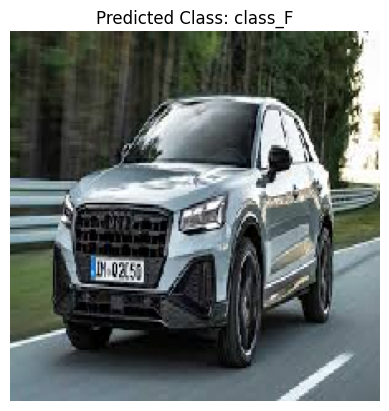

In [46]:
# Get predicted class name using class_mapping
predicted_class_name = class_mapping.get(predicted_class_index, 'Unknown')

# Display the image
plt.imshow(img)
plt.title('Predicted Class: ' + predicted_class_name)
plt.axis('off')  # Remove axis ticks and labels
plt.show()